In [15]:
from ExprEnt import *
import circuits_5q
import circuits_4q
import circuits_3q
import circuits_4q_pre_hadamard
import time

random.seed(725)

circuits = circuits_4q_pre_hadamard.circuits

# visualize circuits
visualize = False
if visualize:
    for c in circuits:
        c.generate_random(1)
        display(c.circuit.draw("mpl"))

In [16]:
L_max = 4
N_samples = 1000
N_bins = 75

data_expr = {L:{} for L in range(1,L_max+1)}
data_ent = {L:{} for L in range(1,L_max+1)}
data_time = {L:{} for L in range(1,L_max+1)}


for v_circuit in circuits:
    print("=========")
    print(f"Circuit " + v_circuit.id)

    #v_circuit.generate_random(1)
    #display(v_circuit.circuit.draw("mpl"))

    for L in range(1, L_max+1):
        print(f'L = {L}')

        t = time.time()
        v_circuit.generate_random(L)
        expr, ent = get_expr_ent(v_circuit, L, N_samples, N_bins)
        elapsed = time.time() - t

        data_expr[L][v_circuit.id] = expr
        data_ent[L][v_circuit.id] = ent
        data_time[L][v_circuit.id] = elapsed

Circuit 1-preh
L = 1
L = 2
L = 3
L = 4
Circuit 2-preh
L = 1
L = 2
L = 3
L = 4
Circuit 3-preh
L = 1
L = 2
L = 3
L = 4
Circuit 4-preh
L = 1
L = 2
L = 3
L = 4
Circuit 5-preh
L = 1
L = 2
L = 3
L = 4
Circuit 6-preh
L = 1
L = 2
L = 3
L = 4
Circuit 7-preh
L = 1
L = 2
L = 3
L = 4
Circuit 8-preh
L = 1
L = 2
L = 3
L = 4
Circuit 9-preh
L = 1
L = 2
L = 3
L = 4
Circuit 10-preh
L = 1
L = 2
L = 3
L = 4
Circuit 11-preh
L = 1
L = 2
L = 3
L = 4
Circuit 12-preh
L = 1
L = 2
L = 3
L = 4
Circuit 13-preh
L = 1
L = 2
L = 3
L = 4
Circuit 14-preh
L = 1
L = 2
L = 3
L = 4
Circuit 15-preh
L = 1
L = 2
L = 3
L = 4
Circuit 16-preh
L = 1
L = 2
L = 3
L = 4
Circuit 17-preh
L = 1
L = 2
L = 3
L = 4
Circuit 18-preh
L = 1
L = 2
L = 3
L = 4
Circuit 19-preh
L = 1
L = 2
L = 3
L = 4


In [17]:
# Save the data

file_path = "4q-preh-1000samples.csv"

with open(file_path, 'w') as file:
    file.write("Circuit id, L, Expr, Ent, Time\n")
    file.write("==============================\n\n")
    for v_circuit in circuits:
        for L in range(1,L_max+1):
            expr = "{:.4f}".format(data_expr[L][v_circuit.id])
            ent = "{:.4f}".format(data_ent[L][v_circuit.id])
            time = "{:.3f}".format(data_time[L][v_circuit.id])
            file.write(f"{v_circuit.id},{L},{expr},{ent},{time}\n")

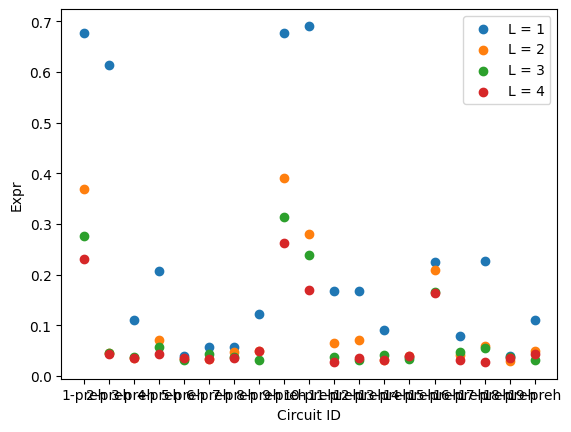

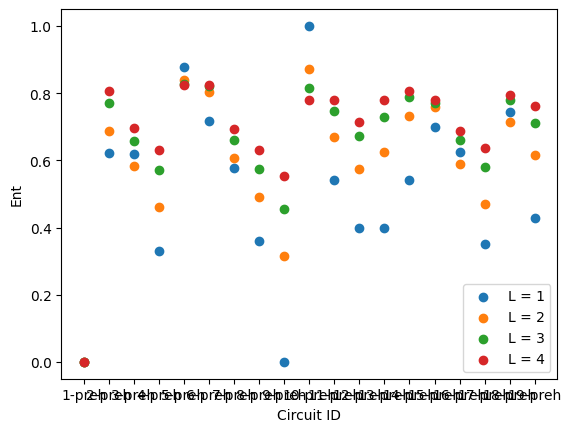

In [18]:
# Quick preview


# expressibility
for L in range(1, L_max+1):
    x = [i+1 for i in range(len(circuits))]
    y = data_expr[L].values()
    plt.scatter(x,y,label=f"L = {L}")

plt.xlabel('Circuit ID')
plt.ylabel('Expr')
my_xticks = [circ.id for circ in circuits]
plt.xticks([i+1 for i in range(len(circuits))], my_xticks)

plt.legend()
plt.show()


# entangling capacity
for L in range(1, L_max+1):
    x = [i+1 for i in range(len(circuits))]
    y = data_ent[L].values()
    plt.scatter(x,y,label=f"L = {L}")

plt.xlabel('Circuit ID')
plt.ylabel('Ent')
my_xticks = [circ.id for circ in circuits]
plt.xticks([i+1 for i in range(len(circuits))], my_xticks)


plt.legend()
plt.show()